Maggie Guo, Alan Zheng

In [ ]:
import requests
from bs4 import BeautifulSoup as b

headers = requests.utils.default_headers()
headers.update({
    'User-Agent': 'Mozilla/5.0 (X11; Ubuntu; Linux x86_64; rv:52.0) Gecko/20100101 Firefox/52.0',
})

# Visualizing Taylor Swift's Repertoire Using VADER and BERT

In this notebook, we retrieve, process, then classify Taylor Swift's songs through NLP tools such as VADER and BERT. 
- We retrieve lyrics from absolutelyrics.com. This data includes all of Taylor Swift's songs up until her second-most recent album, Evermore. Future versions may use the API given by Genius
- The raw HTML data is cleaned for use in language processing data visualization.
- Sentiment analysis using VADER and a rudimentary BERT model is performed, and the results visualized.

In [2]:
# Retrieve the artist's page

base_link = 'http://www.absolutelyrics.com/lyrics/artist/taylor_swift'

page = requests.get(base_link)

In [3]:
soup = b(page.content, "html.parser")

In [5]:
lyric_base = 'http://www.absolutelyrics.com'

# Creating a list of raw song html data for each album. For practical purposes, songs in unknown albums were cut out.
all_album_links = soup.find_all('li', class_='artist_albumlistitem')
all_album_links = [(a.find('div', class_ = 'artist_albuminfo').find('h3').text[:-8], a.find('div', class_='artist_albumsonglist').find_all('li')) for a in all_album_links]

In [6]:
# Create a tuple containing the album name, song title, and url
all_links = [(a[0], b) for a in all_album_links for b in a[1]]
all_links = [(a[0], a[1].find('a')) for a in all_links]

# Remove songs not assigned to any album
# Create path to lyric page
all_links = [(a[0], a[1].text[11:], lyric_base + a[1]['href']) for a in all_links 
             if a[1] is not None and "unkno" not in a[0]]
all_links

[('Evermore',
  'Willow',
  'http://www.absolutelyrics.com/lyrics/view/taylor_swift/willow'),
 ('Evermore',
  'Champagne Problems',
  'http://www.absolutelyrics.com/lyrics/view/taylor_swift/champagne_problems'),
 ('Evermore',
  'Gold Rush',
  'http://www.absolutelyrics.com/lyrics/view/taylor_swift/gold_rush'),
 ('Evermore',
  "'Tis The Damn Season",
  "http://www.absolutelyrics.com/lyrics/view/taylor_swift/'tis_the_damn_season"),
 ('Evermore',
  'Tolerate It',
  'http://www.absolutelyrics.com/lyrics/view/taylor_swift/tolerate_it'),
 ('Evermore',
  'No Body, No Crime',
  'http://www.absolutelyrics.com/lyrics/view/taylor_swift/no_body,2c_no_crime'),
 ('Evermore',
  'Happiness',
  'http://www.absolutelyrics.com/lyrics/view/taylor_swift/happiness'),
 ('Evermore',
  'Dorothea',
  'http://www.absolutelyrics.com/lyrics/view/taylor_swift/dorothea'),
 ('Evermore',
  'Coney Island',
  'http://www.absolutelyrics.com/lyrics/view/taylor_swift/coney_island'),
 ('Evermore',
  'Ivy',
  'http://www.abs

In [7]:
import time 
import numpy as np 
from tqdm import tqdm 

all_songs = []

# Access song page through the second items all_links
# Extract the lyrics 
# Create song dictionaries 
for link in tqdm(all_links): 
    page = requests.get(link[2])
    soup = b(page.content, 'html.parser')

    lyrics = soup.find('p', {'id': 'view_lyrics'}).text

    song = {
        'album': link[0],
        'title': link[1],
        'lyrics': lyrics
    }

    all_songs.append(song.copy())

all_songs

100%|████████████████████████████████████████████████████████████████████████████████| 157/157 [01:26<00:00,  1.81it/s]


[{'album': 'Evermore',
  'title': 'Willow',
  'lyrics': "\n\tI'm like the water when your ship rolled in that night\nRough on the surface but you cut through like a knife\nAnd if it was an open/shut case\nI never would've known from that look on your face\nLost in your current like a priceless wine\n\nThe more that you say, the less I know\nWherever you stray, I follow\nI'm begging for you to take my hand\nWreck my plans, that's my man\n\nLife was a willow and it bent right to your wind\nHead on the pillow, I could feel you sneaking in\nAs if you were a mythical thing\nLike you were a trophy or a champion ring\nAnd there was one prize I'd cheat to win\n\nThe more that you say, the less I know\nWherever you stray, I follow\nI'm begging for you to take my hand\nWreck my plans, that's my man\nYou know that my train could take you home\nAnywhere else is hollow\nI'm begging for you to take my hand\nWreck my plans, that's my man\n\nLife was a willow and it bent right to your wind\nThey count

In [8]:
# Saving data
import json
with open('./data.json', 'w') as f: 
    json.dump(all_songs, f)

In [9]:
# Loading data
import json
with open('./data.json', 'r') as f: 
    loaded_songs = json.load(f)

In [10]:
import re

# Clean the lyrics
def process_lyrics(song): 
    words = song['lyrics']
    words = re.sub('[\(\[].*?[\)\]]', '', words)
    words = words.replace('<br />', '')
    words = words.replace('\n', ' ')
    words = words.replace('\t', '')
    words = words.replace('+', '')
    words = re.sub(r'[^\w\s]', '', words)
    words = words.replace('\'', '')
    words = words.replace('"', '')
    words = words.replace('\r', '')
    words = words.replace('f_ck', 'fuck')
    words = words.replace('f_cked', 'fucked')
    words = words.replace('sh_t', 'shit')
    words = words.replace('b_tch', 'bitch')
    words = words.replace('b_ttons', 'buttons')
    words = words.replace('b_tt', 'butt')
    words = " ".join(words.split())
    words = words.replace('8197', ' ')
    words = words.strip().lower()
    song['lyrics'] = words
    return song

loaded_songs = [process_lyrics(song) for song in loaded_songs]
loaded_songs

[{'album': 'Evermore',
  'title': 'Willow',
  'lyrics': 'im like the water when your ship rolled in that night rough on the surface but you cut through like a knife and if it was an openshut case i never wouldve known from that look on your face lost in your current like a priceless wine the more that you say the less i know wherever you stray i follow im begging for you to take my hand wreck my plans thats my man life was a willow and it bent right to your wind head on the pillow i could feel you sneaking in as if you were a mythical thing like you were a trophy or a champion ring and there was one prize id cheat to win the more that you say the less i know wherever you stray i follow im begging for you to take my hand wreck my plans thats my man you know that my train could take you home anywhere else is hollow im begging for you to take my hand wreck my plans thats my man life was a willow and it bent right to your wind they count me out time and time again life was a willow and it 

In [11]:
import pandas as pd

df = pd.DataFrame(loaded_songs)
df.head()

,album,title,lyrics
0,Evermore,Willow,im like the water when your ship rolled in tha...
1,Evermore,Champagne Problems,you booked the night train for a reason so you...
2,Evermore,Gold Rush,gleaming twinkling eyes like sinking ships on ...
3,Evermore,'Tis The Damn Season,if i wanted to know who you were hanging with ...
4,Evermore,Tolerate It,i sit and watch you reading with your head low...


In [12]:
# Number of songs in each album
df['album'].value_counts()

Lover                                                        18
Evermore                                                     17
Folklore                                                     17
Speak Now                                                    17
1989                                                         16
Red                                                          16
Fearless                                                     16
Reputation                                                   15
Taylor Swift                                                 14
Sounds of the Season: The Taylor Swift Holiday Collection     6
Beautiful Eyes                                                5
Name: album, dtype: int64

In [13]:
df['title'] = df['title'].apply(lambda x: str(x).strip('\"'))
df['album'] = df['album'].apply(lambda x: str(x).strip('\"'))
df['lyrics'] = df['lyrics'].apply(lambda x: str(x).strip('\"'))

In [14]:
import nltk
from nltk.corpus import stopwords

swords = stopwords.words('english')
swords += ['im', 'like', 'youre', 'dont']
swords = [sword.replace("'", "") for sword in swords]
swords

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 'youre',
 'youve',
 'youll',
 'youd',
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 'shes',
 'her',
 'hers',
 'herself',
 'it',
 'its',
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 'thatll',
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each',
 'fe

In [15]:
# Word count for lyrics
top_counts = pd.Series([word for word in " ".join(df['lyrics'].tolist()).split(" ") if word not in swords]).value_counts()
top_counts

know        430
never       304
love        248
time        230
cause       228
           ... 
swung         1
arrow         1
blanks        1
filling       1
unbroken      1
Length: 3256, dtype: int64

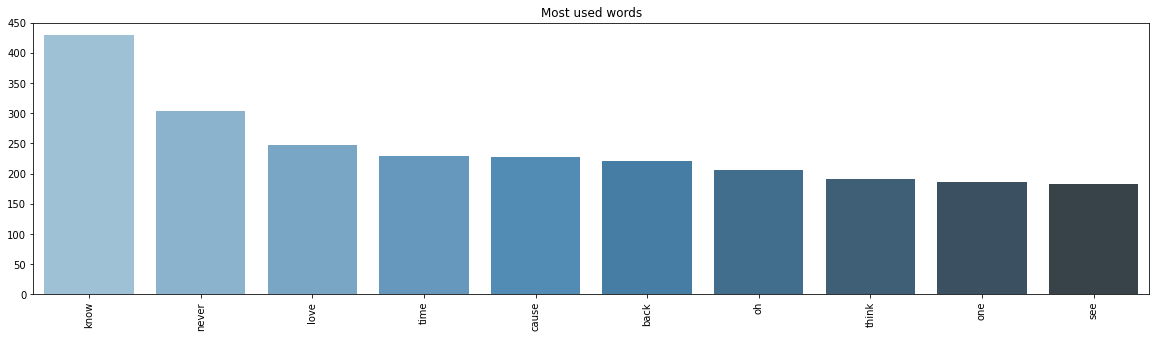

In [16]:
import matplotlib.pyplot as plt

import seaborn as sns

# Plot of the 10 most common words in all albums
plt.figure(figsize=(20, 5))
sns.barplot(x=top_counts.index[:10], y=top_counts[:10], palette='Blues_d')
plt.title('Most Used Words')
plt.ylim(ymin=0,ymax=450)
plt.xticks(rotation=90)
plt.show()

# Sentiment Analysis: VADER Model 

In [56]:
# Sentiment Analysis of lyrics using VADER

from nltk.sentiment.vader import SentimentIntensityAnalyzer

sid = SentimentIntensityAnalyzer() 
df['scores'] = df['lyrics'].apply(lambda l: sid.polarity_scores(l)['compound'])

def vader_predict(output): 
    polarity = 'neutral'
    if output >= 0.05: 
        polarity = 'positive'
    if output <= -0.05:
        polarity = 'negative'
    return polarity 

df['sentiment'] = df['scores'].apply(vader_predict)
df.head()

,album,title,lyrics,bert scores,bert sentiment,scores,sentiment
0,Evermore,Willow,im like the water when your ship rolled in tha...,0.976746,positive,0.9776,positive
1,Evermore,Champagne Problems,you booked the night train for a reason so you...,0.884965,positive,-0.5210,negative
2,Evermore,Gold Rush,gleaming twinkling eyes like sinking ships on ...,0.000734,negative,0.9979,positive
3,Evermore,'Tis The Damn Season,if i wanted to know who you were hanging with ...,0.946775,positive,-0.6185,negative
4,Evermore,Tolerate It,i sit and watch you reading with your head low...,0.998922,positive,0.9931,positive


In [57]:
df['sentiment'].value_counts() 

positive    110
negative     46
neutral       1
Name: sentiment, dtype: int64

<Figure size 1440x1080 with 0 Axes>

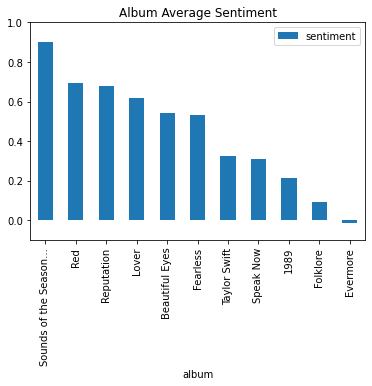

In [58]:
# Average sentiment of albums using VADER, visualized

album_list = [a[0] for a in all_album_links]
album_list = album_list[:-1]

df_dict = {}
means = []

for a in album_list:
    df_dict[a] = df[df['album'] == a]
    
    # Positivity is represented on the interval [-1, 1]: -1 represents total negativity, 1 is the opposite
    means = means + [df_dict[a]['scores'].mean()]

df_avg_score = pd.DataFrame({'album' : album_list, 'sentiment' : means})
df_avg_score = df_avg_score.set_index('album').sort_values('sentiment', ascending = False)

df_avg_score_plot = df_avg_score.reset_index()
df_avg_score_plot.iloc[0, 0] = 'Sounds of the Season...'
df_avg_score_plot = df_avg_score_plot.set_index('album')

plt.figure(figsize = (20, 15))
df_avg_score_plot.plot.bar()
plt.title('Album Average Sentiment')
plt.ylim(ymin=-0.1,ymax=1)
plt.ylabel('')
plt.xticks(rotation=90)
plt.show()

<AxesSubplot:xlabel='album'>

<Figure size 1440x720 with 0 Axes>

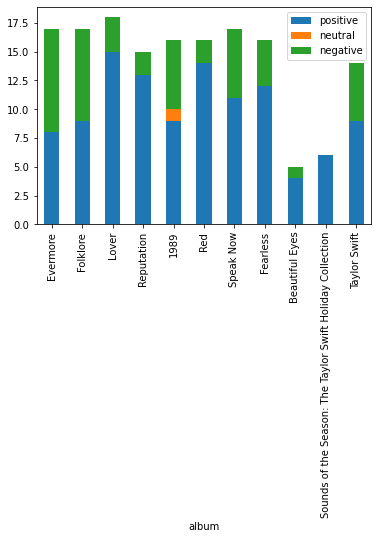

In [61]:
pos = []
neu = []
neg = []

for a in album_list:
    pos = pos + [len(df_dict[a][df_dict[a]['sentiment'] == 'positive'].index)]
    neu = neu + [len(df_dict[a][df_dict[a]['sentiment'] == 'neutral'].index)]
    neg = neg + [len(df_dict[a][df_dict[a]['sentiment'] == 'negative'].index)]
    
album_sentiment_count = pd.DataFrame({'album' : album_list, 
                                      'positive' : pos, 
                                      'neutral' : neu, 
                                      'negative' : neg})
album_sentiment_count = album_sentiment_count.set_index('album')

plt.figure(figsize = (20, 10))
album_sentiment_count.plot(kind = 'bar', stacked = True)
plt.title('Album Positive and Negative')

# Taylor's RED: Visualization of a Single Album

In [21]:
red_df = df[df['album']=='Red']

In [22]:
red_df.head(10)

,album,title,lyrics
83,Red,State of Grace,im walking fast through the traffic lights bus...
84,Red,Red,loving him is like driving a new maserati down...
85,Red,Treacherous,put your lips close to mine as long as they do...
86,Red,I Knew You Were Trouble,once upon a time a few mistakes ago i was in y...
87,Red,All Too Well,i walked through the door with you the air was...
88,Red,22,it feels like a perfect night to dress up like...
89,Red,I Almost Do,i bet this time of night youre still up i bet ...
90,Red,We Are Never Ever Getting Back Together,i remember when we broke up the first time say...
91,Red,Stay Stay Stay,im pretty sure we almost broke up last night i...
92,Red,The Last Time,found myself at your door just like all those ...


In [23]:
common_words = pd.Series([word for word in " ".join(red_df['lyrics'].tolist()).split(" ") if word not in swords]).value_counts()
common_words

know         75
time         54
oh           50
never        50
ever         34
             ..
self          1
paralyzed     1
fly           1
paper         1
whats         1
Length: 717, dtype: int64

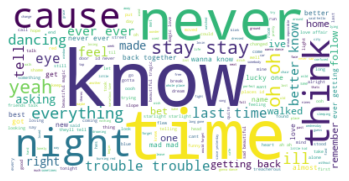

In [24]:
# Red lyrics wordcloud
from wordcloud import WordCloud, STOPWORDS

text = " ".join(words for words in red_df.lyrics)
wordcloud = WordCloud(background_color='white', stopwords=swords).generate(text)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

# Sentiment Analysis: BERT

VADER is suitable for shorter, blog-length sentences, but is not as accurate for complex data. 
We will attempt to use BERT below for a more accurate sentiment analysis

In [25]:
import os
import shutil

import tensorflow as tf
import tensorflow_hub as hub
import tensorflow_text as text
from official.nlp import optimization  # to create AdamW optimizer

import matplotlib.pyplot as plt

tf.get_logger().setLevel('ERROR')

C:\Users\T450\anaconda3\lib\site-packages\tensorflow_addons\utils\ensure_tf_install.py:53: UserWarning: Tensorflow Addons supports using Python ops for all Tensorflow versions above or equal to 2.9.0 and strictly below 2.12.0 (nightly versions are not supported). 
 The versions of TensorFlow you are currently using is 2.8.4 and is not supported. 
Some things might work, some things might not.
If you were to encounter a bug, do not file an issue.
If you want to make sure you're using a tested and supported configuration, either change the TensorFlow version or the TensorFlow Addons's version. 
You can find the compatibility matrix in TensorFlow Addon's readme:
https://github.com/tensorflow/addons
  warnings.warn(


In [27]:
# Retrieving a BERT model trained in a different file
dataset_name = 'imdb'
saved_model_path = './{}_bert'.format(dataset_name.replace('/', '_'))
reloaded_model = tf.saved_model.load(saved_model_path)

In [41]:
def print_my_examples(inputs, results):
  result_for_printing = \
    [f'input: {inputs[i]:<30} : score: {results[i][0]:.6f}'
                         for i in range(len(inputs))]
  print(*result_for_printing, sep='\n')
  print()

lyric_data = [a['lyrics'] for a in loaded_songs]
reloaded_results = tf.sigmoid(reloaded_model(tf.constant(lyric_data)))
reloaded_results

<tf.Tensor: shape=(157, 1), dtype=float32, numpy=
array([[9.76745844e-01],
       [8.84964585e-01],
       [7.33792782e-04],
       [9.46774960e-01],
       [9.98921990e-01],
       [1.30387247e-01],
       [4.03740108e-02],
       [9.99396622e-01],
       [2.55793333e-03],
       [9.98771191e-01],
       [5.08935452e-01],
       [2.44795084e-02],
       [9.61304784e-01],
       [9.91179764e-01],
       [1.06993318e-03],
       [9.28537250e-01],
       [9.43209529e-01],
       [9.22674060e-01],
       [7.31332898e-01],
       [9.20496464e-01],
       [7.97212124e-04],
       [9.47061181e-03],
       [9.99396682e-01],
       [9.99576032e-01],
       [9.99355555e-01],
       [3.81551862e-01],
       [9.94440079e-01],
       [1.48601979e-01],
       [2.52735615e-03],
       [5.90652406e-01],
       [2.72291601e-02],
       [8.69790912e-01],
       [9.92972910e-01],
       [2.93362439e-02],
       [2.91967392e-03],
       [9.45051074e-01],
       [9.99474883e-01],
       [3.01685929e-03],


In [49]:
reloaded_scores = [a[0].numpy() for a in reloaded_results]
df['bert scores'] = reloaded_scores
df

,album,title,lyrics,bert scores
0,Evermore,Willow,im like the water when your ship rolled in tha...,0.976746
1,Evermore,Champagne Problems,you booked the night train for a reason so you...,0.884965
2,Evermore,Gold Rush,gleaming twinkling eyes like sinking ships on ...,0.000734
3,Evermore,'Tis The Damn Season,if i wanted to know who you were hanging with ...,0.946775
4,Evermore,Tolerate It,i sit and watch you reading with your head low...,0.998922
...,...,...,...,...
152,Taylor Swift,Mary's Song (Oh My My My),she said i was seven and you were nine i looke...,0.986293
153,Taylor Swift,Our Song,i was riding shotgun with my hair undone in th...,0.999279
154,Taylor Swift,I'm Only Me when I'm with You,friday night beneath the stars in a field behi...,0.998028
155,Taylor Swift,Invisible,she cant see the way your eyes light up when y...,0.997581


In [50]:
df['bert sentiment'] = df['bert scores'].apply(lambda x: 'positive' if x > 0.5 else 'negative')
df

,album,title,lyrics,bert scores,bert sentiment
0,Evermore,Willow,im like the water when your ship rolled in tha...,0.976746,positive
1,Evermore,Champagne Problems,you booked the night train for a reason so you...,0.884965,positive
2,Evermore,Gold Rush,gleaming twinkling eyes like sinking ships on ...,0.000734,negative
3,Evermore,'Tis The Damn Season,if i wanted to know who you were hanging with ...,0.946775,positive
4,Evermore,Tolerate It,i sit and watch you reading with your head low...,0.998922,positive
...,...,...,...,...,...
152,Taylor Swift,Mary's Song (Oh My My My),she said i was seven and you were nine i looke...,0.986293,positive
153,Taylor Swift,Our Song,i was riding shotgun with my hair undone in th...,0.999279,positive
154,Taylor Swift,I'm Only Me when I'm with You,friday night beneath the stars in a field behi...,0.998028,positive
155,Taylor Swift,Invisible,she cant see the way your eyes light up when y...,0.997581,positive


<Figure size 1440x1080 with 0 Axes>

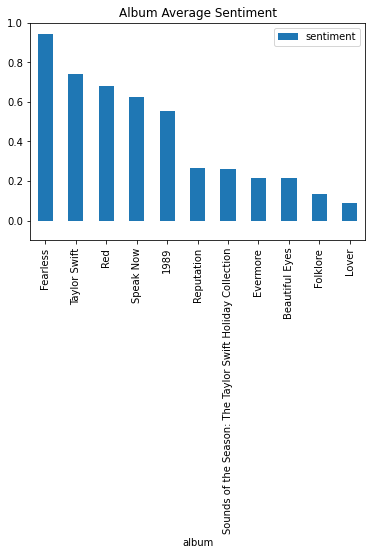

In [64]:
album_list = [a[0] for a in all_album_links]
album_list = album_list[:-1]

df_dict = {}
names = []
means = []

for a in album_list:
    df_dict[a] = df[df['album'] == a]
    names = names + [a]
    
    # Positivity is represented on the interval [-1, 1]: -1 represents total negativity, 1 is the opposite
    means = means + [df_dict[a]['bert scores'].mean() * 2 - 1]

df_avg_score = pd.DataFrame({'album' : names, 'sentiment' : means})
df_avg_score = df_avg_score.set_index('album').sort_values('sentiment', ascending = False)

df_avg_score_plot = df_avg_score.reset_index()
df_avg_score_plot = df_avg_score_plot.set_index('album')

plt.figure(figsize = (20, 15))
df_avg_score_plot.plot.bar()
plt.title('Album Average Sentiment')
plt.ylim(ymin = 0, ymax = 1)
plt.xticks(rotation=90)
plt.show()

<Figure size 1440x720 with 0 Axes>

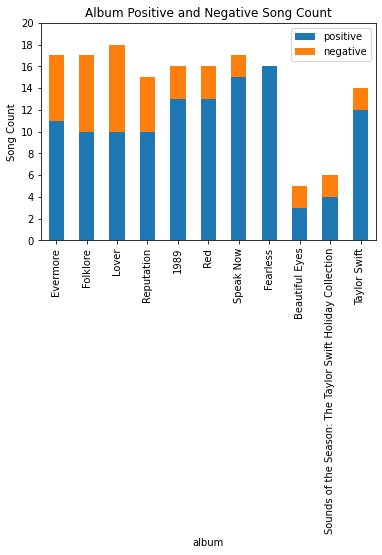

In [75]:
pos = []
neg = []

for a in album_list:
    pos = pos + [len(df_dict[a][df_dict[a]['bert sentiment'] == 'positive'].index)]
    neg = neg + [len(df_dict[a][df_dict[a]['bert sentiment'] == 'negative'].index)]
    
bert_sentiment_count = pd.DataFrame({'album' : album_list, 
                                      'positive' : pos,
                                      'negative' : neg})

bert_sentiment_count = bert_sentiment_count.set_index('album')

plt.figure(figsize = (20, 10))
bert_sentiment_count.plot(kind = 'bar', stacked = True, title = 'Album Positive and Negative Song Count: BERT')
plt.yticks(range(0, 21, 2))
plt.ylabel('Song Count')
plt.show()